# Thief Detector
## This task tests your Image Processing skills to build a motion detection algorithm that alarms you when you have an unwanted visitor in your home.

## Steps
- 1. Get the live video feed from your webcam
- 2. Fix a scene (the place you want to monitor) and store it as a reference background image
    - Store the first frame as the reference background frame
- 3. For every frame, check if there is any unwanted object inside the scene you are monitoring
    - Use **Background Subtraction** concept (**cv2.absdiff( )**)
        - Subtract the current frame from the reference background image(frame) to see the changes in the scene
        - If there is enormous amount of pixels distrubed in the subtraction result image
            - unwanted visitor (place is unsafe --> alarm the authorities)
        - If there is no enormous amount of pixels distrubed in the subtraction result image
            - no unwanted visitor (place is safe)
- 4. Output the text **"UNSAFE"** in **red** color on the top right of the frame when there is an intruder in the scene.
- 5. Save the live feed
- 6. Submit the (.ipynb) file

## Get live video feed from webcam [10 points]

In [1]:
# !pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
video = cv2.VideoCapture(0)

## Read first frame, convert to Grayscale and store it as reference background image [10 points]

In [4]:
ret,frame = video.read()

In [5]:
cv2.imshow('video',frame)
cv2.waitKey(0)

-1

In [6]:
# cv2.destroyAllWindows()

In [7]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

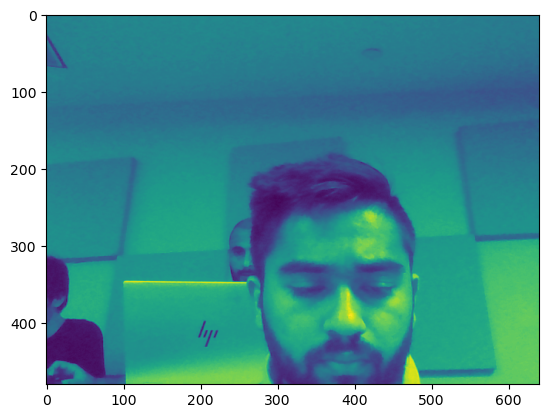

In [8]:
plt.imshow(gray)

## Compute Absolute Difference between Current and First frame [20 points]

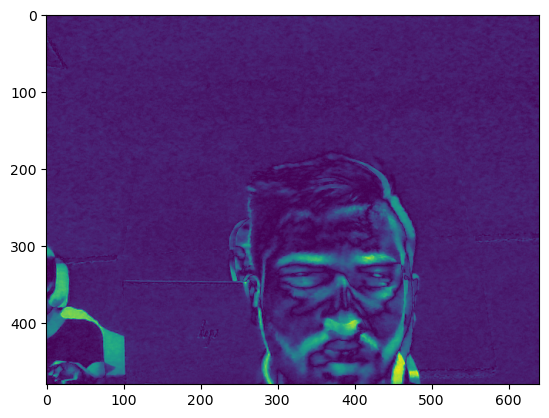

In [9]:
while True:
    # Read the current frame
    ret, frame = video.read()

    # Check if the frame was read successfully
    if not ret:
        print("Error: Could not read frame.")
        break

    # Convert the current frame to grayscale
    current_frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current and first frame
    abs_diff = cv2.absdiff(gray, current_frame_gray)

    # Display the original and absolute difference frames
    # cv2.imshow('Original Frame', frame)
    cv2.imshow('Absolute Difference', abs_diff)

    # Break the loop if the 'Esc' key is pressed
    if cv2.waitKey(30) & 0xFF == 27:  # 27 is the ASCII code for the 'Esc' key
        break
plt.imshow(frame)
plt.imshow(abs_diff)

## Apply threshold [5 points]

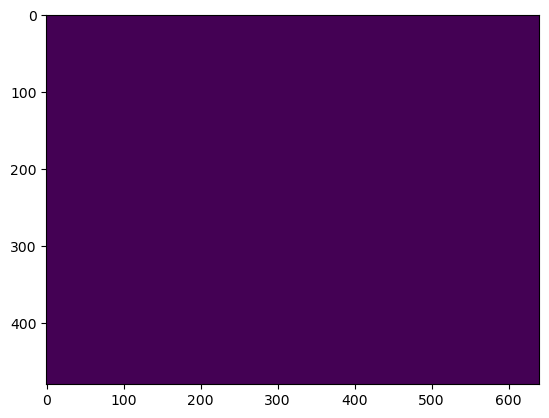

In [10]:
_, thresholded = cv2.threshold(abs_diff, 125, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded)

## Find contours [10 points]

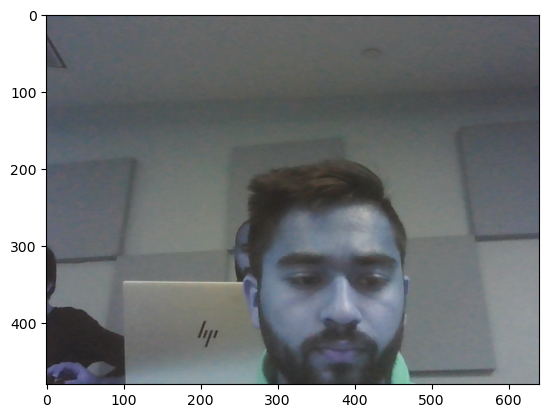

In [11]:
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
frame_with_contours = frame.copy()
cv2.drawContours(frame_with_contours, contours, -1, (0, 255, 0), 2)  # -1 means draw all contours
plt.imshow(frame_with_contours)

## Check if contourArea is large and draw rectangle around the object, output "UNSAFE" text in red color [30 points]

In [12]:
for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)

        # Set a threshold for contour area
        if area > 1000:  # You can adjust this threshold based on your specific requirements
            # Draw a rectangle around the object
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle

            # Output "UNSAFE" text in red color
            cv2.putText(frame, "UNSAFE", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)


## Display images [10 points]

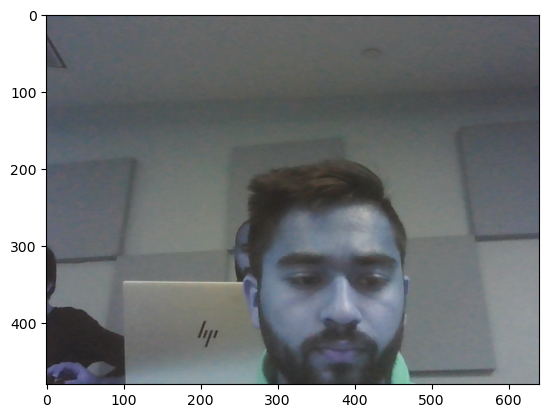

In [13]:
plt.imshow(frame)

In [14]:
# cv2.destroyAllWindows()

## Release objects [5 points]

In [15]:
video.release()

In [5]:
def detect_motion(frame, prev_frame):
    # Convert frames to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference between frames
    diff_frame = cv2.absdiff(gray_prev_frame, gray_frame)

    # Apply threshold to highlight the regions with significant differences
    _, threshold_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded frame
    contours, _ = cv2.findContours(threshold_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contour has significant area (motion)
    for contour in contours:
            # Calculate the area of the contour
            area = cv2.contourArea(contour)
    
            # Set a threshold for contour area
            if area > 1000:  # You can adjust this threshold based on your specific requirements
                # Draw a rectangle around the object
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle
    
                # Output "UNSAFE" text in red color
                cv2.putText(frame, "UNSAFE", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    return False

In [6]:
import cv2

In [7]:
def main():
    video_capture = cv2.VideoCapture(0)
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    out = cv2.VideoWriter("thief_detection.avi", fourcc, 20.0, (640, 480))

    # Initialize previous frame
    _, prev_frame = video_capture.read()

    while True:
        # Capture frame-by-frame
        ret, frame = video_capture.read()

        if not ret:
            print("Error reading frame from the webcam.")
            break

        # Check for motion
        if detect_motion(frame, prev_frame):
            print("Motion detected! Saving video...")
            for _ in range(30):  # Save 30 frames (approx. 1.5 seconds)
                out.write(frame)
                _, frame = video_capture.read()

        # Update previous frame
        prev_frame = frame.copy()

        # Display the resulting frame
        cv2.imshow('Thief Detector', frame)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release resources
    video_capture.release()
    out.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()